In [1]:
import osmnx as ox
from shapely.geometry import Point
import geopandas as gpd
import overpy
from shapely.geometry import shape
from shapely.geometry import Point
import folium
from folium import Choropleth, Circle, Marker, CircleMarker
from folium.plugins import HeatMap, MarkerCluster

import osmnx as ox

import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import contextily as ctx

import mplleaflet
import matplotlib as mpl
import matplotlib.cm as cm

In [39]:
amenity_weights = {
"grocery": [3],
"restaurants": [.75, .45, .25, .25, .225, .225, .225, .225, .2, .2],
"shopping": [.5, .45, .4, .35, .3], #clothing, shoes, gift shops, specialty food stores, children’s stores, etc.
"coffee": [1.25, .75],
"banks": [1],
"parks": [1],
"schools": [1],
"books": [1],
"entertainment": [1],
}

In [42]:
%matplotlib inline
import matplotlib.colors as mcolors
import warnings
warnings.simplefilter("ignore")


In [2]:
import pandas as pd

In [4]:
df1=pd.read_csv(open(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\Moscow_datasets\data-28509-2020-04-15.csv'))

C:\Users\Intra24\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df1[df1['TypeService']=='реализация непродовольственных товаров']['TypeObject'].unique()

array(['Магазин «Промтовары»', 'Магазин-салон',
       'Прочие специализированные непродовольственные предприятия торговли',
       'Магазин «Ткани»', 'Магазин «Хозяйственные товары»',
       'Магазин «Секонд Хенд»', 'Универмаг', 'Магазин «Цветы»',
       'Магазин «Мебель»', 'Магазин «Обувь»', 'Товары для детей',
       'Универмаг «Детский Мир»', 'Магазин «Одежда»',
       'Магазин «Спорт и туризм»', 'Товары для женщин', 'Автосалон',
       'Магазин «Зоотовары»', 'Магазин товаров повседневного спроса',
       'Магазин «Мир садовода»', 'Комиссионный магазин',
       'Магазин «Дисконт»', 'Магазин «Книги»', 'Магазин «Бутик»',
       'Военторг', 'Минимаркет', 'Магазин-склад',
       'Товары для новобрачных', 'Магазин «Семена»',
       'Магазин «Электротовары»', 'Товары для дома', 'Магазин «Охотник»',
       'Товары для будущих мам', 'Магазин «Дискаунтер»', 'Торговый Дом',
       'Гипермаркет (непродовольственный)', 'Товары для полных',
       'Товары для мужчин', 'Магазин «Природа»',
     

In [7]:
df_grocery=df1[df1['TypeService']=='реализация продовольственных товаров']

df_malls=df1[df1['TypeObject']=='Торговые центры (аутлет-центр, молл, ритейл-парк)']

df_shopping=df1[(df1['TypeObject'].isin([
    'Торговые центры (аутлет-центр, молл, ритейл-парк)',
    'Магазин-склад непродовольственный (опт)','Магазин-склад',
    'Универсальный общетоварный непродовольственный склад' ])==False) &
               (df1['TypeService']=='реализация продовольственных товаров')
               ]

In [19]:
df2=pd.read_csv(open(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\Moscow_datasets\data-4275-2020-04-14.csv'))

In [21]:
df2['TypeObject'].value_counts()

кафе                                 6513
столовая                             2392
ресторан                             2310
предприятие быстрого обслуживания    2246
бар                                  1043
кафетерий                             624
буфет                                 535
закусочная                            438
магазин (отдел кулинарии)             382
Name: TypeObject, dtype: int64

In [27]:
df_coffee=df2[df2['TypeObject'].isin(['кафе','кафетерий','буфет','закусочная'])]
df_restaurant=df2[df2['TypeObject'].isin(['столовая','ресторан','предприятие быстрого обслуживания','бар'])]

In [29]:
import geopandas as gpd

In [1]:
df_attract=gpd.read_file(r'C:\Users\Intra24\Desktop\Glasgow_uni\Group_project\open_moscow.json')

NameError: name 'gpd' is not defined

In [31]:
df_attract.head(2)

,index,properties,type,Caption,CategoryId,DepartmentId,dataset_id,geometry
0,0,"{'DatasetId': 495, 'VersionNumber': 3, 'Releas...",Feature,cinema,162,8,495,MULTIPOINT (37.57130 55.68281)
1,1,"{'DatasetId': 495, 'VersionNumber': 3, 'Releas...",Feature,cinema,162,8,495,MULTIPOINT (37.71851 55.68587)


In [35]:
df_park=df_attract[df_attract['Caption'].isin(['park','botanic_garden','park_relax_zone'])]

In [36]:
df_ped=df_attract[df_attract['Caption'].isin(['view_point','pedestrian_area'])]

In [40]:
df_ent=df_attract[df_attract['Caption'].isin(['theatres','cinema','concert_venue'])]

In [41]:
df_sport=df_attract[df_attract['Caption'].isin(['sport_ground','football_field','swimming pool', 'climbing_center',
                                               'aquapark','regby_field','motor-racing circuit'])]

In [ ]:
#добавить транспортную доступность

In [224]:
df_rail=pd.read_csv(open(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\Moscow_datasets\data-414-2020-03-20.csv'))

In [48]:
df_bus_stations=pd.read_csv(open(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\Moscow_datasets\bus_stations.csv'))

In [51]:
df_metro_stations=pd.read_csv(open(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\Moscow_datasets\metro_stations.csv'))

In [2]:
df_schools=pd.read_csv(open(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\Moscow_datasets\schools.csv'))

In [3]:
df_uni=pd.read_csv(open(r'C:\Users\Intra24\Desktop\Glasgow_uni\Dissertation and Smart Museums\Moscow_datasets\university.csv'))

In [4]:
def convert_df_gdf(df,caption):
    try:
        df['geometry']=df.geoData.apply(lambda s: shape({'type':'Point','coordinates':[float(s[26:-2].split(',')[0]),float(s[26:-2].split(',')[1])]}))
    except:
        df['geometry']=df.geoData.apply(lambda s: shape({'type':'Point','coordinates':[float(s[19:-21].split(' , ')[0]),float(s[19:-21].split(' , ')[1])]}))
  
    df_new=df[['global_id','geometry']].copy()
    df_new['Caption']=caption
    return gpd.GeoDataFrame(df_new, geometry='geometry', crs='epsg:4326')

In [5]:
gdf_uni=convert_df_gdf(df_uni,'university')

['ФГБОУ ВО «МГУТУ им. К.Г. Разумовского (ПКУ)»',
 'Московский государственный университет имени М.В.Ломоносова;МГУ имени М.В.Ломоносова;Московский университет;МГУ',
 'ФГБОУ ВО «МГУПП»;ФГБОУ ВО «Московский государственный университет пищевых производств»;Московский государственный университет пищевых производств;МГУПП',
 'МГУУ Правительства Москвы;Университет Правительства Москвы']

In [10]:
df_uni[df_uni['ShortName'].isin([i for i in df_uni['ShortName'] if 'МГУ' in i])]

,global_id,ID,Code,FullName,ShortName,CommonName,AdmArea,District,ZipCode,Address,...,LicStatus,LicNum,LicDocSer,LicDocNum,LicDate,LicExp,TypeOfOwnership,Subord,geoData,geometry
12,639894042,23,23,Федеральное государственное бюджетное образова...,ФГБОУ ВО «МГУТУ им. К.Г. Разумовского (ПКУ)»,МГУТУ им. Разумовского,Центральный административный округ,Таганский район,109004,"город Москва, улица Земляной Вал, дом 73",...,Действует,1125,90Л01,8109,10.11.2014,бессрочно,государственное,Министерство науки и высшего образования Росси...,"{type=Point, coordinates=[37.6560119564379, 55...",POINT (37.6560119564379 55.745986240524)
21,639894054,58,58,Федеральное государственное бюджетное образова...,Московский государственный университет имени М...,МГУ,Западный административный округ,район Раменки,119991,"город Москва, территория Ленинские Горы, дом 1",...,Действует,1353,90Л01,8333,01.04.2015,бессрочно,государственное,Правительство Российской Федерации,"{type=Point, coordinates=[37.530734, 55.702908...",POINT (37.530734 55.70290883)
77,639894816,165,165,Федеральное государственное бюджетное образова...,ФГБОУ ВО «МГУПП»;ФГБОУ ВО «Московский государс...,Пищевой,Северный административный округ,район Сокол,125080,"город Москва, Волоколамское шоссе, дом 11, стр...",...,Действует,2531,90Л01,9606,08.02.2017,бессрочно,государственное,Министерство науки и высшего образования Росси...,"{type=Point, coordinates=[37.4965741150206, 55...",POINT (37.4965741150206 55.8063825060204)
79,639894819,131,131,Государственное автономное образовательное учр...,МГУУ Правительства Москвы;Университет Правител...,МГУУ,Центральный административный округ,Красносельский район,107045,"город Москва, улица Сретенка, дом 28",...,Действует,2886,90Л01,10019,26.03.2020,бессрочно,государственное,Правительство Москвы,"{type=Point, coordinates=[37.6331731323614, 55...",POINT (37.6331731323614 55.7707953117105)


In [81]:
gdf_metro=convert_df_gdf(df_metro_stations,'metro')

In [204]:
gdf_metro.merge(df_metro_stations[['global_id','NameOfStation']], on='global_id').to_csv('metro.csv')

In [211]:
gdf_bus=convert_df_gdf(df_bus_stations,'bus')

In [213]:
gdf_bus.to_file('gdf_bus.shp')

In [215]:
gdf_rail=convert_df_gdf(df_rail,'rail')

In [223]:
gdf_rail.to_file('gdf_rail1.shp')

In [115]:
gdf_coffee=convert_df_gdf(df_coffee,'coffee')

In [114]:
gdf_rests=convert_df_gdf(df_restaurant,'restaurants')


In [171]:
gdf_grocery=convert_df_gdf(df_grocery,'grocery')
gdf_shopping=convert_df_gdf(df_shopping,'shopping')
gdf_malls=convert_df_gdf(df_malls,'mall')

In [109]:
df_ent['Caption']='entertainment'
df_park['Caption']='park'
df_sport['Caption']='sport'
df_ped['Caption']='ped_area'

In [117]:
import requests

In [123]:
api_key='a2327bd3ff5aceb690bbb7b3199bfddf'
url='https://apidata.mos.ru/v1/features/2263/?api_key=%s'%(api_key)
r = requests.get(url)

In [127]:
gdf_schools=pd.DataFrame(r.json()['features'])

In [6]:
gdf_schools['geometry']=gdf_schools['geometry'].apply(lambda x: shape(x))

NameError: name 'gdf_schools' is not defined

In [146]:
gdf_schools['global_id']=gdf_schools['properties'].apply(lambda x:x['Attributes']['LicensingAndAccreditation'][0]['LicenseNumber'])

In [149]:
gdf_schools.drop(['properties','type'], axis=1, inplace=True)

In [151]:
gdf_schools['Caption']='school'

In [165]:
df_ped['global_id']=df_ped['properties'].apply(lambda x:x['Attributes']['global_id'])
df_sport['global_id']=df_sport['properties'].apply(lambda x:x['Attributes']['global_id'])
df_park['global_id']=df_park['properties'].apply(lambda x:x['Attributes']['global_id'])
df_ent['global_id']=df_ent['properties'].apply(lambda x:x['Attributes']['global_id'])

In [208]:
gdf_infrastructure=pd.concat([gdf_rail,
                              gdf_schools,
                              df_ped[['global_id','geometry','Caption']],df_sport[['global_id','geometry','Caption']],df_park[['global_id','geometry','Caption']],df_ent[['global_id','geometry','Caption']],
                              gdf_rests,gdf_coffee,
                              gdf_uni,
                              #gdf_metro,
                              gdf_bus,
                              gdf_grocery,
                              gdf_shopping,
                              gdf_malls])

In [209]:
gdf_infrastructure['Caption'].value_counts()

grocery          19173
shopping         19135
metro            12067
coffee            8110
restaurants       7991
sport             4919
park               937
school             598
university         277
entertainment      116
ped_area            26
rail                 9
mall                 3
Name: Caption, dtype: int64

rail


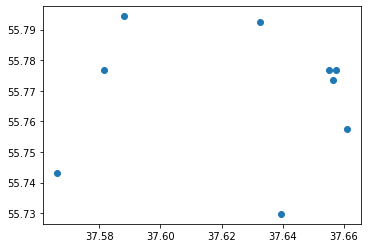

school


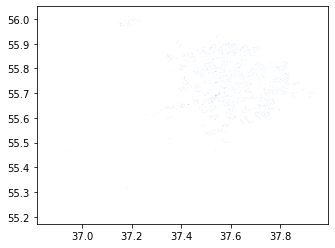

ped_area


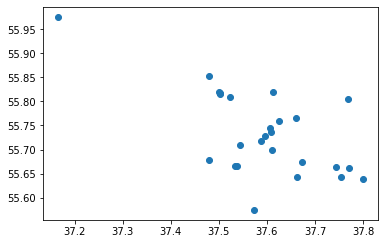

sport


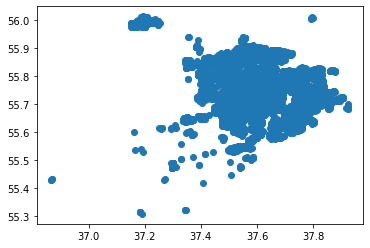

park


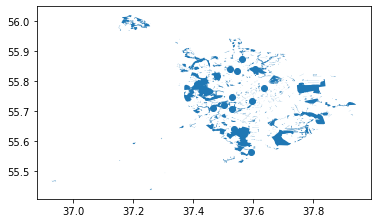

entertainment


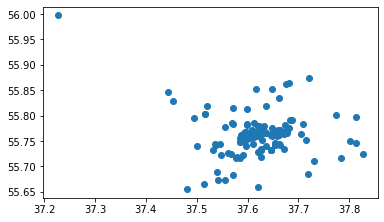

restaurants


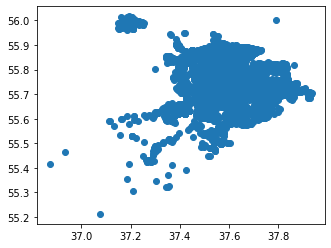

coffee


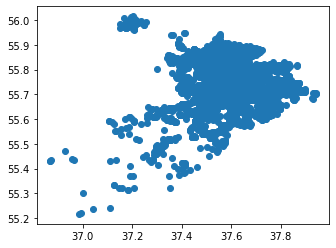

university


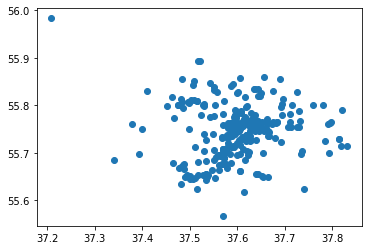

metro


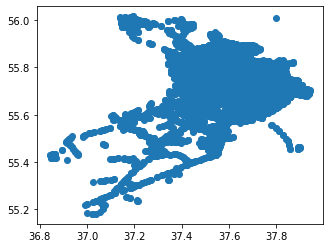

grocery


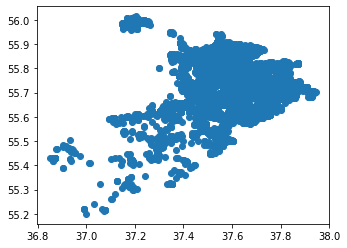

shopping


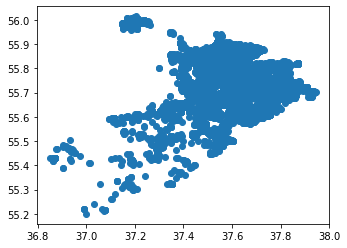

mall


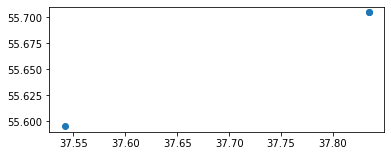

In [178]:
for c in gdf_infrastructure['Caption'].unique():
    print(c)
    gdf_infrastructure[gdf_infrastructure['Caption']==c].plot()
    plt.show()

In [196]:
gdf_infrastructure[gdf_infrastructure['Caption']=='school']

,global_id,geometry,Caption
0,0007051,"POLYGON ((37.47932 55.78360, 37.47881 55.78369...",school
1,0009061,"POLYGON ((37.67584 55.73946, 37.67558 55.73949...",school
2,0006430,"MULTIPOLYGON (((37.71587 55.62107, 37.71575 55...",school
3,0007139,"POLYGON ((37.73308 55.80328, 37.73345 55.80266...",school
4,0007734,"POLYGON ((37.66742 55.60455, 37.66729 55.60468...",school
...,...,...,...
593,0007759,"MULTIPOLYGON (((37.51463 55.65731, 37.51463 55...",school
594,0008128,"MULTIPOLYGON (((37.68825 55.58150, 37.68841 55...",school
595,0007934,"MULTIPOLYGON (((37.52289 55.72743, 37.52279 55...",school
596,0009540,"POLYGON ((37.62068 55.60286, 37.62075 55.60297...",school


In [197]:
gdf_infrastructure.to_file('moscow_insfrastructure.geojson', driver='GeoJSON')

In [3]:
d=gpd.read_file('moscow_insfrastructure.geojson', driver='GeoJSON')

In [4]:
d['Caption'].value_counts()

grocery          19173
shopping         19135
metro            13081
coffee            8110
restaurants       7991
sport             4919
park               937
school             598
university         277
entertainment      116
ped_area            26
rail                 9
mall                 3
Name: Caption, dtype: int64